In [1]:
from pycocotools_extended.coco_extended import COCOextended
from pycocotools_extended.coco_detection_dataset import COCOdetection
from pycocotools_extended.transforms import create_transform

In [2]:
import albumentations as albu
import matplotlib.pyplot as plt
import cv2

# COCOext

In [3]:
imgs_path = '/hdd/datasets/logo/QMUL-OpenLogo/openlogo/images'
anns_path = '/hdd/datasets/logo/QMUL-OpenLogo/openlogo/annotations/train.json'

In [4]:
coco_ext = COCOextended(anns_path, imgs_path)

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


In [5]:
augs = [albu.Rotate(limit=(-90, 90), border_mode=cv2.BORDER_CONSTANT, p=1.)]
transform = create_transform(augs, size=(250, 250), normalize=False)

In [6]:
coco_ext_audi_cola = coco_ext.map_categories({
    1: 'audi',
    2: 'cocacola'
}, '/home/rvey/tmp/train_with_audi_cocacola.json')

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [7]:
coco_ext_audi_cola.anns_path, coco_ext_audi_cola.imgs_path

('/home/rvey/tmp/train_with_audi_cocacola.json',
 '/hdd/datasets/logo/QMUL-OpenLogo/openlogo/images')

## Display bboxes

In [8]:
ids_8 = coco_ext_audi_cola().getImgIds()[:8]

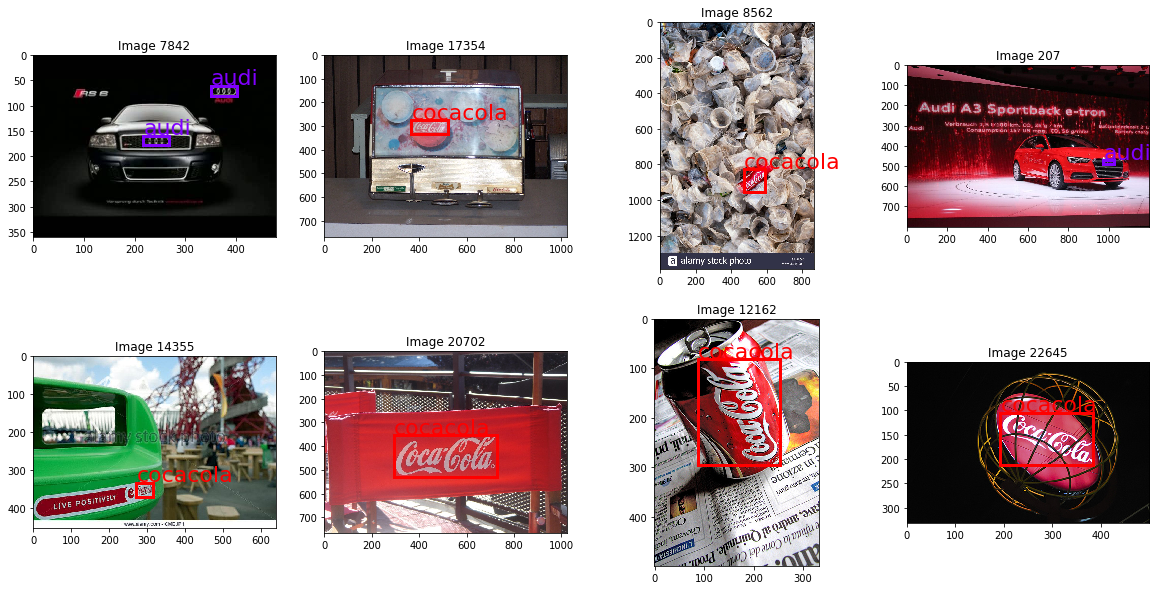

In [9]:
coco_ext_audi_cola.display_bboxes_by_img_ids(ids_8)

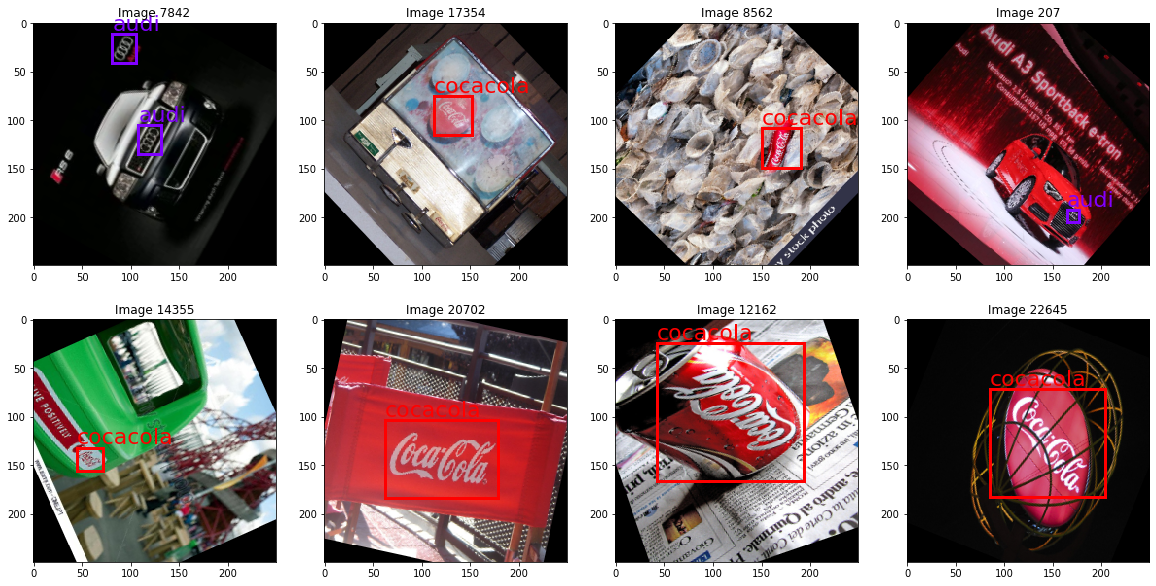

In [10]:
coco_ext_audi_cola.display_bboxes_by_img_ids(ids_8, transform)

## Show meta

In [11]:
coco_ext_audi_cola.cat2name, coco_ext_audi_cola.name2cat, coco_ext_audi_cola.colors

({2: 'cocacola', 1: 'audi'},
 {'cocacola': 2, 'audi': 1},
 array([[5.0000000e-01, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00],
        [1.0000000e+00, 1.2246468e-16, 6.1232340e-17, 1.0000000e+00]]))

In [12]:
coco_ext_audi_cola.calculate_categories()

Counter({2: 1156, 1: 211})

## Remove invalid images from dataset

In [13]:
coco_ext_audi_cola = coco_ext_audi_cola.clean('/home/rvey/tmp/train_with_audi_cocacola_clean_imgs.json')

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


## Split dataset into train/test

In [14]:
coco_ext_audi_cola.train_test_split('/home/rvey/tmp/train_with_audi_cocacola_train.json', '/home/rvey/tmp/train_with_audi_cocacola_test.json', train_size=.8)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


(<pycocotools_extended.coco_extended.COCOextended at 0x7f31c65e4160>,
 <pycocotools_extended.coco_extended.COCOextended at 0x7f31c47ef668>)

## Get COCO class

In [15]:
coco_ext_audi_cola()

## Additional possibilities

In [16]:
ann_ids = coco_ext_audi_cola().getAnnIds()[:5]

In [17]:
ann_ids = coco_ext_audi_cola.filter_ann_ids_by_min_area(ann_ids, min_area=0.)

In [18]:
cropped_bboxes = coco_ext_audi_cola.get_cropped_bboxes_by_ann_ids(ann_ids)

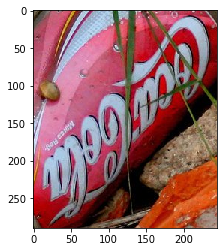

In [19]:
plt.imshow(cropped_bboxes[0])

## Show how transformation works

In [20]:
img_id = coco_ext_audi_cola().getImgIds()[0]

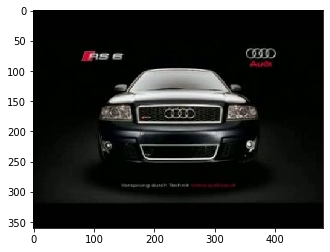

In [21]:
img = coco_ext_audi_cola.get_image_by_img_id(img_id)
plt.imshow(img)

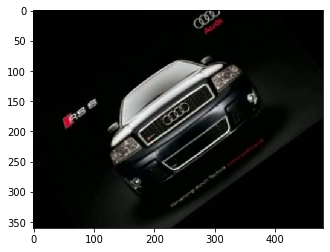

In [22]:
augs = [albu.Rotate(limit=(-90, 90), border_mode=cv2.BORDER_CONSTANT, p=1.)]
transform = create_transform(augs, normalize=False, bboxes=False)
img = transform(image=img)['image']
plt.imshow(img)

In [23]:
meta = coco_ext_audi_cola.get_meta_by_img_id(img_id, bboxes=True, categs=True)
transform(image=img, bboxes=meta['bboxes'], category_id=meta['categs']).keys()

dict_keys(['image', 'bboxes', 'category_id'])

# COCOdetection (torch.dataset compitable)

In [24]:
augs = [albu.Rotate(limit=(-90, 90), border_mode=cv2.BORDER_CONSTANT, p=1.)]
transform = create_transform(augs, size=224)

In [25]:
coco_detection = COCOdetection(anns_path, imgs_path, transform)

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


In [26]:
len(coco_detection)

21666

In [27]:
coco_detection[0]

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044,